# Project Airline Data

## Overview

This project analyzes airplane accident data in order to determine which aircraft(s) are the lowest risk to begin a new business endeavor: operating private and commercial airplanes. The undisclosed company will be able to use this data to decide which aircraft will be their first investment.

## Business Understanding

A company is looking to invest in airplanes, and would like to know which airplanes would be the lowest risk to branch out to offering commercial and private travel options.

In [1]:
# Imports here
import pandas as pd 
import numpy as np
df = pd.read_csv('Data/Aviation_Data.csv')
df

/Users/DonJuve/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Understanding

Accident data from the National Transportation Safety Board (NTSB) was used and analyzed. Each accident has an associated unique ID. The data file provides type of aircraft, severity of accident, damage to aircraft, and other characteristics involved with accidents.


In [4]:
df['Total.Fatal.Injuries'].value_counts()

0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64

In [5]:
df['Make'].value_counts()

Cessna            22227
Piper             12029
CESSNA             4922
Beech              4330
PIPER              2841
                  ...  
Finney Thorp          1
RAF                   1
Francis               1
RUDBERG TODD W        1
Mahler                1
Name: Make, Length: 8237, dtype: int64

In [6]:
df['Total.Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
325.0        1
230.0        1
260.0        1
251.0        1
414.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

In [7]:
#represent ~ 14% of data 
df['Total.Fatal.Injuries'].isna().sum()

12860

In [8]:
#represent ~ 15% of data 
df['Total.Serious.Injuries'].isna().sum()

13969

In [9]:
##represent ~ 14% of data 
df['Total.Minor.Injuries'].isna().sum()

13392

In [10]:
df['Total.Uninjured'].isna().sum()

7371

In [11]:
df['Event.Date'].isna().sum()

1459

In [12]:
df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

## Data Preparation

DATA CLEANNING 

The data cleanning process will include normalizing columns names and dropping unecessary colummnss

In [13]:
#Dropping unecessary columns
columns_to_drop_na = ['Injury.Severity','Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Date', 'Report.Status']
df.dropna(subset=columns_to_drop_na, inplace=True)

In [14]:
# Removing the duplicates values
df.drop_duplicates(inplace=True)

In [15]:
df['Make'].value_counts()

Cessna               17868
Piper                 9694
CESSNA                3881
Beech                 3379
PIPER                 2256
                     ...  
Mascola                  1
Evolution Trikes         1
EASTERWOOD MARK W        1
Cryder                   1
FUNK RALPH               1
Name: Make, Length: 6441, dtype: int64

In [16]:
df['Make'] = df['Make'].str.capitalize()
df['Make'].value_counts()

Cessna                 21749
Piper                  11950
Beech                   4167
Bell                    1990
Boeing                  1314
                       ...  
Sherman craig w            1
R.o. and d.o hewitt        1
Oconnell                   1
Balony kubicek spol        1
Strong                     1
Name: Make, Length: 5955, dtype: int64

In [17]:
#creating the year column
df['Year'] = df['Event.Date'].str[:4]
print(df['Year'])

0        1948
1        1962
3        1977
6        1981
7        1982
         ... 
90098    2022
90106    2022
90120    2022
90194    2022
90226    2022
Name: Year, Length: 67887, dtype: object


In [18]:
df.shape

(67887, 32)

In [19]:
df['Aircraft.Category'].value_counts()

Airplane             19089
Helicopter            2141
Glider                 371
Balloon                177
Weight-Shift           151
Gyrocraft              130
Powered Parachute       87
Ultralight              19
Unknown                  5
Powered-Lift             1
Rocket                   1
WSFT                     1
Blimp                    1
Name: Aircraft.Category, dtype: int64

In [20]:
# to select only the Airplane category in the Aircraft category column
df = df[df['Aircraft.Category'] == 'Airplane']

In [21]:
df['Aircraft.Category'].value_counts()

Airplane    19089
Name: Aircraft.Category, dtype: int64

In [22]:
# first lets determine the total of the overall Injuries
df['Total.Injuries'] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
df['Fatality.Rate'] = df['Total.Fatal.Injuries'] / df['Total.Injuries']


<ipython-input-22-71d943d1c5bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total.Injuries'] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
<ipython-input-22-71d943d1c5bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatality.Rate'] = df['Total.Fatal.Injuries'] / df['Total.Injuries']


In [38]:
df_clean = df[df['Make'].isin(df['Make'].value_counts().nlargest(30).index)]
df_clean


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Total.Injuries,Fatality.Rate
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,0.0,NaN
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,0.0,NaN
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982,1.0,0.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982,1.0,1.0
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90089,20221011106095,Accident,CEN23LA011,2022-10-05,"Navasota, TX",United States,302315N,0096516W,60R,Navasota,...,0.0,0.0,1.0,VMC,NaN,The pilots loss of control while landing resu...,NaN,2022,0.0,NaN
90098,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,304354N,0096752W,PVT,Private,...,0.0,0.0,1.0,VMC,NaN,The pilots failure to maintain control of the...,20-12-2022,2022,0.0,NaN
90106,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,034055N,0835224W,LZU,GWINNETT COUNTY - BRISCOE FLD,...,0.0,0.0,2.0,VMC,NaN,An in-flight collision with a bird while on ap...,20-12-2022,2022,0.0,NaN
90120,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,034849N,0097722W,1F0,Ardmore Downtown Executive Air,...,0.0,0.0,1.0,VMC,NaN,The pilot did not ensure adequate clearance fr...,20-12-2022,2022,0.0,NaN


In [24]:
df_clean['Total.Injuries'].describe()

count    13972.000000
mean         0.798669
std          3.592661
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        228.000000
Name: Total.Injuries, dtype: float64

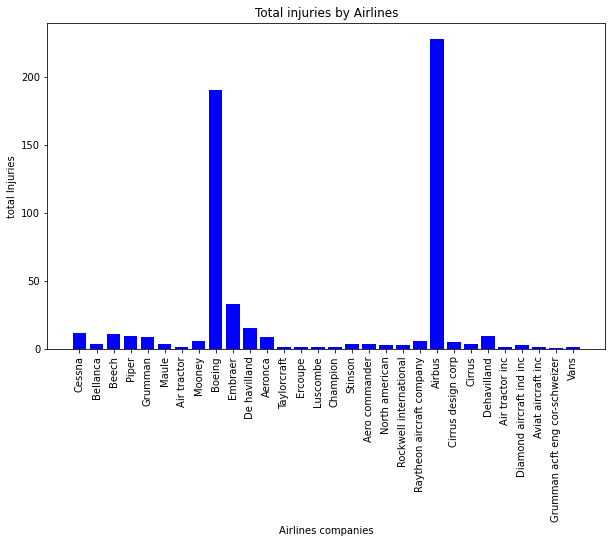

In [25]:
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(1, 3, figsize=(10, 18)) 
plt.figure(figsize=(10, 6))
                        
plt.bar(df_clean['Make'], df_clean['Total.Injuries'], color='blue')
plt.xlabel('Airlines companies')
plt.ylabel('total Injuries')
plt.title('Total injuries by Airlines')
plt.tick_params (axis="x", labelrotation=90)                       
plt.show()
                        
                        
# Plot 1
#axs[0].bar(df_clean['Make'], df_clean['Total.Injuries'], color='blue')
#axs[0].set_xlabel('Airlines companies')
#axs[0].set_ylabel('total Injuries')
#axs[0].set_title ('Total injuries by Airlines')
#axs[0].tick_params(axis="x", labelrotation=90)                

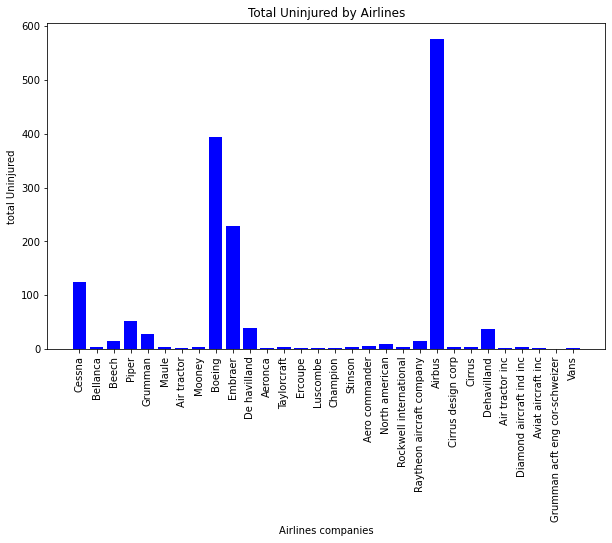

In [26]:
plt.figure(figsize=(10, 6))
                        
plt.bar(df_clean['Make'], df_clean['Total.Uninjured'], color='blue')
plt.xlabel('Airlines companies')
plt.ylabel('total Uninjured')
plt.title('Total Uninjured by Airlines')
plt.tick_params (axis="x", labelrotation=90)                       
plt.show()
          

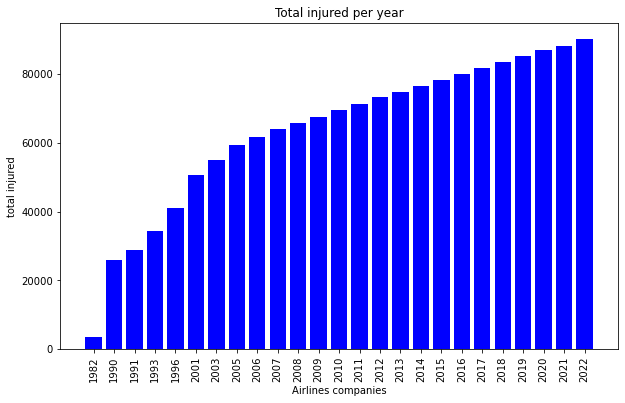

In [27]:
plt.figure(figsize=(10, 6))
                        
plt.bar(df_clean['Year'], df_clean['Total.Injuries'].keys(),color='blue')
plt.xlabel('Airlines companies')
plt.ylabel('total injured')
plt.title('Total injured per year')
plt.tick_params (axis="x", labelrotation=90)                       
plt.show()
          
    
    

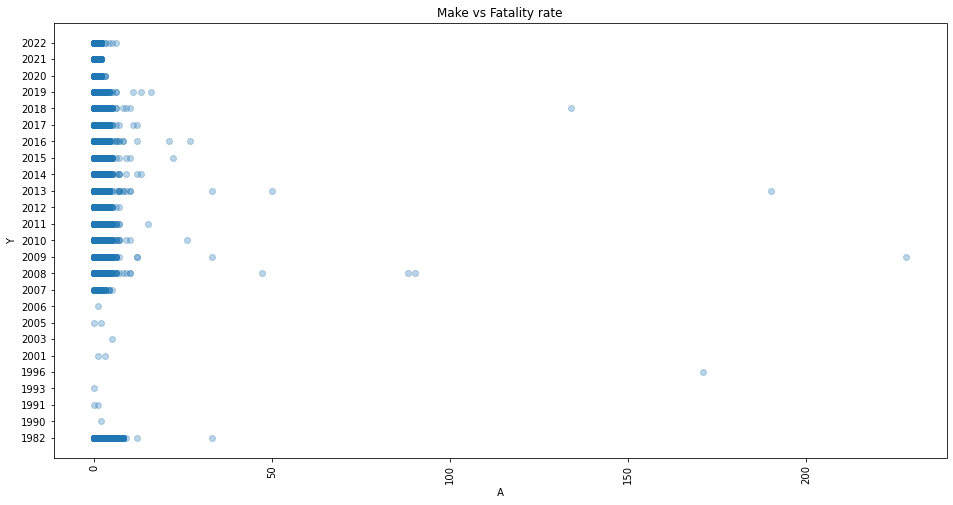

In [28]:

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=df_clean["Total.Injuries"], y=df_clean['Year'], alpha=0.3
)
ax.tick_params(axis="x", labelrotation=90)
ax.set_xlabel(" A ")
ax.set_ylabel("Y")
ax.set_title("Make vs Fatality rate");


## Analysis and Results

### Business Recommendation 1

### Business Recommendation 2

### Business Recommendation 3

## Conclusion

### Next Steps